# Final Version Of Whole Pipeline
----

Welcome to introductory notebook. There are 11 notebooks other than this notebook that we used during the development of Litereature Recommendation Software (LRS) to find best topic modeling technique and best model parameters.

In the other notebooks, dataflow might be seen a bit confusing at first glance. The name of notebooks starts with a number that mostly indicates in which order the notebooks are run. Basically, output of the notebook that has lower number is given as an input to a notebook thas has higher number. However, running notebooks over the all dataset might not be possible since training is taking very large amount of time. Also, we cannot share the input files that require are required for notebooks since they are very big. 

in this notebook, we want to show how whole pipeline is working from raw input PDF files to predicting articles given user input.

This notebook can be worked on both Google Colab and local environment. If you are working on local environment, skip the first step.

## 1. Connect to GDrive and set working directory
1. Add a shortcut for working directory('IDPCode') to your drive as depicted below:
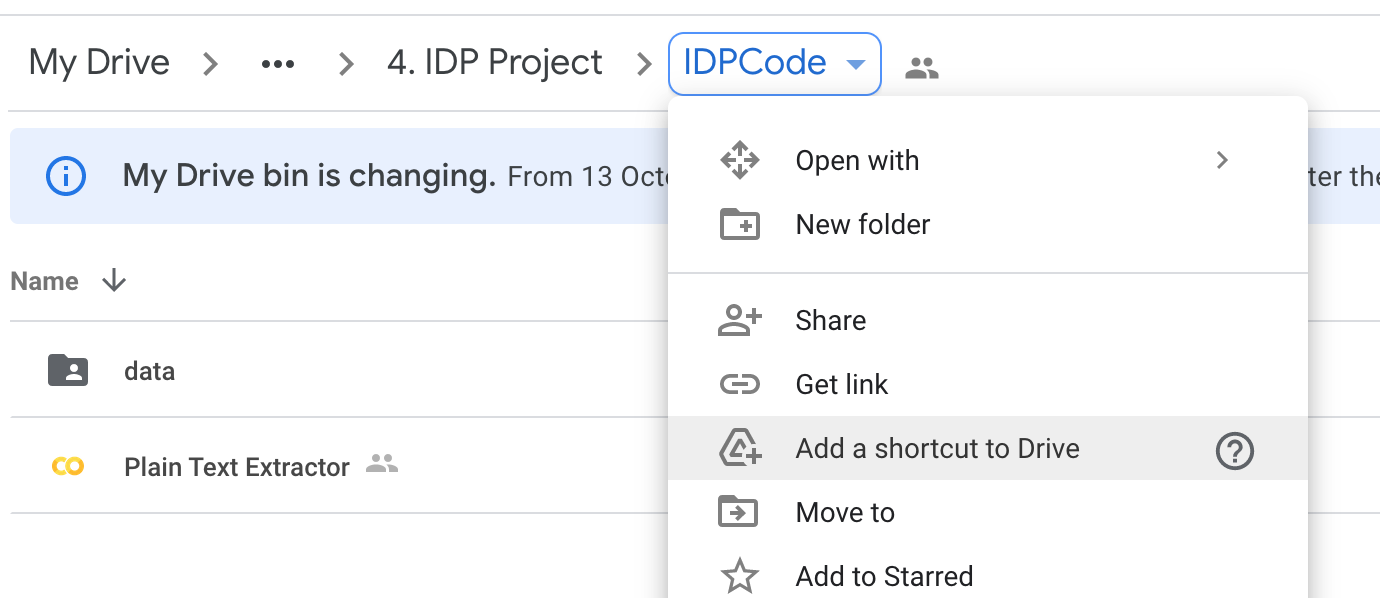
2. Run the command below to connect the GDrive:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/IDPCode/

## 2. Install requirements

In [2]:
# Library install examples: https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb
!pip install requirements.txt

import pandas as pd

ERROR: Could not find a version that satisfies the requirement requirements.txt (from versions: none)
ERROR: No matching distribution found for requirements.txt
You should consider upgrading via the '/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/bin/python -m pip install --upgrade pip' command.


## 3. Set configs

In [26]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# show execution time of cells
%load_ext autotime
%load_ext autoreload
%autoreload 2

ACCOUNTING_PAPER_DIRECTORY = 'data/AccountingPapers'
STOPWORDS_DIRECTORY = 'data/StopWords'
RELEVANT_PAPERS_PATH = 'data/DATA_RELEVANT.xlsx'
USER_RATINGS = 'user_validation.xlsx'

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
time: 24 ms


In [28]:
from DataPreProcessing.DataPreProcessingTechniques import *
from lrs.util import *
dp = DataPreProcessingTechniques()

time: 31.2 ms


## 4. PDF Extraction

In [5]:
papers = dp.find_data_files(ACCOUNTING_PAPER_DIRECTORY)

data = []

for paper in papers:
  data.append(dp.tika_parser(paper, 3)) #take first 3 pages of each paper

dt = pd.DataFrame.from_dict(data) 

dt = dp.reorder_columns(dt)
dt.to_pickle('All_Papers_In_Plain_Text_TIKA.pkl')

2021-04-15 11:01:54,267 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /var/folders/lc/994g0gcs7ds8j_zwd8bjpmzc0000gn/T/tika-server.jar.


Start to process data/AccountingPapers/6_TAR/73_TAR.pdf at 1618477314258...

2021-04-15 11:04:35,245 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /var/folders/lc/994g0gcs7ds8j_zwd8bjpmzc0000gn/T/tika-server.jar.md5.
2021-04-15 11:04:36,035 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
/Users/farukcankaya/FC/TUM/IDP/nlp-examples/DataPreProcessing/DataPreProcessingTechniques.py:100: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 100 of the file /Users/farukcankaya/FC/TUM/IDP/nlp-examples/DataPreProcessing/DataPreProcessingTechniques.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  xhtml

then it is processed in 178883 milliseconds
Start to process data/AccountingPapers/6_TAR/72_TAR.pdf at 1618477493141...then it is processed in 449 milliseconds
Start to process data/AccountingPapers/6_TAR/46_TAR.pdf at 1618477493591...then it is processed in 513 milliseconds
Start to process data/AccountingPapers/6_TAR/71_TAR.pdf at 1618477494104...then it is processed in 513 milliseconds
Start to process data/AccountingPapers/6_TAR/78_TAR.pdf at 1618477494617...then it is processed in 729 milliseconds
Start to process data/AccountingPapers/6_TAR/20_TAR.pdf at 1618477495346...then it is processed in 841 milliseconds
Start to process data/AccountingPapers/6_TAR/81_TAR.pdf at 1618477496187...then it is processed in 337 milliseconds
Start to process data/AccountingPapers/6_TAR/21_TAR.pdf at 1618477496524...then it is processed in 275 milliseconds
Start to process data/AccountingPapers/6_TAR/98_TAR.pdf at 1618477496799...then it is processed in 593 milliseconds
Start to process data/Accoun

## 5. Data Cleaning
### 5.1. Load words to be removed

In [7]:
REPLACED_WORDS_EXCEL = pd.read_excel(STOPWORDS_DIRECTORY+'/removed_words.xlsx')
REPLACED_WORDS = REPLACED_WORDS_EXCEL[REPLACED_WORDS_EXCEL['Reasonable?']==True]
REPLACED_WORDS.head(10)
print(f'Number of words: {len(REPLACED_WORDS_EXCEL)}')
print(f'Number of approved words: {len(REPLACED_WORDS)}')
REPLACED_WORDS.head(10)
REPLACED_WORDS = REPLACED_WORDS['Removed Words'].values
print(REPLACED_WORDS)

Number of words: 289
Number of approved words: 76
['framework for the analysis' 'testingic auditing' 'review process'
 'journal accounting and public policy' 'the accounting review'
 'accounting forum' 'critical perspectives accointing'
 'accounting and business research'
 'accounting auditing accountability journal' 'doi' 'new york'
 'managementothing' 'winter' 'accounting and finance' 'copyright'
 'account public policy' 'accounting research and policy making'
 'november' 'accounting horizons' 'june' 'ybare' 'aos' 'fdi'
 'int tax public finance' 'european accounting review'
 'management accounting research' 'jel classification' 'the role big'
 'research managerial accounting learning' 'managerial auditing journal'
 'autumn' 'february' 'issnmanagement accounting research' 'peer reviews'
 'disclosuresnge' 'mcb university press' 'may' 'available online'
 'sarbanesoxley act' 'rev account stud' 'december' 'july' 'fall'
 'contemporary accounting research' 'march' 'january'
 'vale louis gol

### 5.2. Load Stopwords

In [9]:
stop_words_data1 = open(STOPWORDS_DIRECTORY + "/StopWords_Auditor.txt", "r").read().lower().split()
stop_words_data2 = open(STOPWORDS_DIRECTORY + "/StopWords_Currencies.txt", "r").read().lower().split()
stop_words_data3 = open(STOPWORDS_DIRECTORY + "/StopWords_DatesandNumbers.txt").read().lower().split()
stop_words_data4 = open(STOPWORDS_DIRECTORY + "/StopWords_Generic.txt").read().lower().split()
stop_words_data5 = open(STOPWORDS_DIRECTORY + "/StopWords_GenericLong.txt").read().lower().split()
stop_words_data6 = open(STOPWORDS_DIRECTORY + "/StopWords_Geographic.txt").read().lower().split()
stop_words_data7 = open(STOPWORDS_DIRECTORY + "/StopWords_Names.txt").read().lower().split()

mallet_stop_words_en = open(STOPWORDS_DIRECTORY + "/MALLET_en.txt", "r").read().lower().split()
mallet_stop_words_fr = open(STOPWORDS_DIRECTORY + "/MALLET_fr.txt", "r").read().lower().split()

stop_words_data2 = list(filter(lambda a : a != "|", stop_words_data2))
stop_words_data3 = list(filter(lambda a : a != "|", stop_words_data3))
stop_words_data6 = list(filter(lambda a : a != "|", stop_words_data6))
stop_words_data7 = list(filter(lambda a : a != "|", stop_words_data7))

stop_words_data = stop_words_data1 + \
stop_words_data2 + \
stop_words_data3 + \
stop_words_data4 + \
stop_words_data5 + \
stop_words_data6 + \
stop_words_data7 + \
mallet_stop_words_en + \
mallet_stop_words_fr

print(f'{len(set(stop_words_data1))} => StopWords_Auditor.txt')
print(f'{len(set(stop_words_data2))} => StopWords_Currencies.txt')
print(f'{len(set(stop_words_data3))} => StopWords_DatesandNumbers.txt')
print(f'{len(set(stop_words_data4))} => StopWords_Generic.txt')
print(f'{len(set(stop_words_data5))} => StopWords_GenericLong.txt')
print(f'{len(set(stop_words_data6))} => StopWords_Geographic.txt')
print(f'{len(set(stop_words_data7))} => StopWords_Names.txt')
print(f'{len(set(mallet_stop_words_en))} => MALLET English Stopwords')
print(f'{len(set(mallet_stop_words_fr))} => MALLET French Stopwords')

print(f'StopWords_Auditor.txt {len(stop_words_data1)}' + \
'StopWords_Currencies.txt {len(stop_words_data2)}' + \
'StopWords_DatesandNumbers.txt {len(stop_words_data3)}' + \
'StopWords_Generic.txt {len(stop_words_data4)}' + \
'StopWords_GenericLong.txt {len(stop_words_data5)}' + \
'StopWords_Geographic.txt {len(stop_words_data6)}' + \
'StopWords_Names.txt {len(stop_words_data7)}')
print(f'MALLET_en.txt {len(mallet_stop_words_en)}')
print(f'MALLET_fr.txt {len(mallet_stop_words_fr)}')

from gensim.parsing.preprocessing import STOPWORDS
stop_list = STOPWORDS.union(set(stop_words_data))

from spacy.lang.en.stop_words import STOP_WORDS
stop_list = STOPWORDS.union(stop_list)

8 => StopWords_Auditor.txt
189 => StopWords_Currencies.txt
115 => StopWords_DatesandNumbers.txt
121 => StopWords_Generic.txt
570 => StopWords_GenericLong.txt
198 => StopWords_Geographic.txt
11904 => StopWords_Names.txt
523 => MALLET English Stopwords
126 => MALLET French Stopwords
StopWords_Auditor.txt 8StopWords_Currencies.txt {len(stop_words_data2)}StopWords_DatesandNumbers.txt {len(stop_words_data3)}StopWords_Generic.txt {len(stop_words_data4)}StopWords_GenericLong.txt {len(stop_words_data5)}StopWords_Geographic.txt {len(stop_words_data6)}StopWords_Names.txt {len(stop_words_data7)}
MALLET_en.txt 524
MALLET_fr.txt 126
time: 1.02 s


In [15]:
from DataPreProcessing.DataPreProcessingTechniques import *
dp = DataPreProcessingTechniques()

'data/AccountingPapers/6_TAR/73_TAR.pdf'

time: 20.4 ms


### 5.3 Remove Irrelavent Papers

In [30]:
rt = pd.read_excel(RELEVANT_PAPERS_PATH)
matched_count = 0
relevant_title = []
relevant_doi = []
relevant_link = []
relevant_authors = []
relevant_year = []
relevant = []
for i in range(0, len(dt['file_path'])):
  if rt['Filename'].str.match(get_file_name(dt['file_path'][i])).any():
    matched_count += 1
    relevant.append('True')
    relevant_title.append(rt.iloc[rt.index[rt['Filename'].str.match(get_file_name(dt['file_path'][i]))][0]]['Title'])
    relevant_doi.append(rt.iloc[rt.index[rt['Filename'].str.match(get_file_name(dt['file_path'][i]))][0]]['DOI'])
    relevant_link.append(rt.iloc[rt.index[rt['Filename'].str.match(get_file_name(dt['file_path'][i]))][0]]['Link'])
    relevant_authors.append(combine_authors(rt.iloc[rt.index[rt['Filename'].str.match(get_file_name(dt['file_path'][i]))][0]]['Authors']))
    relevant_year.append(combine_authors(rt.iloc[rt.index[rt['Filename'].str.match(get_file_name(dt['file_path'][i]))][0]]['Year']))
  else:
    relevant.append('False')
    relevant_title.append("-")
    relevant_doi.append("-")
    relevant_link.append("-")
    relevant_authors.append("-")
    relevant_year.append("-")
    
dt['title'] = relevant_title
dt['doi'] = relevant_doi
dt['link'] = relevant_link
dt['authors'] = relevant_authors
dt['year'] = relevant_year
dt['relevant'] = relevant

time: 9.78 s


In [31]:
non_relevant_indexes = dt.index[dt['relevant'].str.match('False')]
dt = dt.drop(non_relevant_indexes)
dt.info()
dt.reset_index(drop=True, inplace=True)
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 75 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10 non-null     object 
 1   total_page_count                             10 non-null     int64  
 2   page_1                                       10 non-null     object 
 3   page_1_wc                                    10 non-null     int64  
 4   page_2                                       10 non-null     object 
 5   page_2_wc                                    10 non-null     int64  
 6   page_3                                       10 non-null     object 
 7   page_3_wc                                    10 non-null     int64  
 8   Author                                       10 non-null     object 
 9   Content-Type                                 10 non-null     object 
 10  Creat

### 5.4 Clean data and remove unnecessary terms using words loaded in 5.1 and 5.2
#### 5.4.1 Data Cleaning
In this step, we will apply a sequence of processes:

##### 5.4.1.1 Clean 
- Remove non-ascii characters
- Lowercase
- Remove E-Mail addresses
- Remove bracket, punctuation and numbers
- Remove links
- Remove newline characters
- Remove text in square brackets
- Remove words containing numbers
- Remove words with less than 2 characters

##### 5.4.1..2 Remove Non-English sentences
##### 5.4.1.3 Remove Words that are not important to differentiate documents in Accounting Domain
##### 5.4.1.4 Remove Stop words that we found in step 1.2.
##### 5.4.1.5 Apply lemmatization
In this step, we remove all the words but not 'NOUN', 'ADJ', 'VERB', 'ADV'.

----

In [32]:
dt['content_3'] = dt['page_1'].apply(str) + ' ' \
                + dt['page_2'].apply(str) + ' ' \
                + dt['page_3'].apply(str)

columns=['file_path', 'title', 'doi', 'link', 'authors', 'content_3']
dt3c = pd.DataFrame(dt, columns=columns)

time: 28.3 ms


In [34]:
dt3c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  10 non-null     object
 1   title      10 non-null     object
 2   doi        10 non-null     object
 3   link       10 non-null     object
 4   authors    10 non-null     object
 5   content_3  10 non-null     object
dtypes: object(6)
memory usage: 608.0+ bytes
time: 30.3 ms


## 6. Train Topic Models
We use `nlp` and its `LanguageDetector` below to clean data.

In [37]:
import en_core_web_sm
nlp = en_core_web_sm.load()
#https://pypi.org/project/spacy-langdetect/
from spacy_langdetect import LanguageDetector
nlp.add_pipe(LanguageDetector(), name="language_detector", last=True)

time: 855 ms


We import `pandarallel` package to apply data cleaning tasks in parallel. This library dramatically descrease the running time if you have enough core. We apply datapreprocessing staff in a computer with 8 cores so it helped us a lot.

In [38]:
from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
time: 48 ms


In [42]:
NUM_OF_TOPICS = 5
NUM_OF_WORDS_IN_EACH_TOPIC = 10
from lrs.base_model import *
from lrs.lsa_model import *
from lrs.lda_model import *
from lrs.nmf_model import *

time: 25.7 ms


### 6.1. LSA

In [43]:
lsa_model = LSAModel(REPLACED_WORDS, stop_list, nlp)

# Load cleaned data
lsa_model.load_data(df=dt3c, 
                    columns=['file_path', 'title', 'doi', 'link', 'authors', 'content_3'], 
                    data_column='content_3')

lsa_model.set_vectorizer(max_df=0.95, min_df=2, max_features=5000)
lsa_model.vectorize()

lsa_model.train(n_components=NUM_OF_TOPICS, n_words=NUM_OF_WORDS_IN_EACH_TOPIC)


time: 90.8 ms


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['002', 'ain', 'aren', 'bosnia', 'couldn', 'dist', 'female', 'genealogy', 'gov', 'hadn', 'hasn', 'herzegovina', 'http', 'isn', 'list_of_most_common_surnames', 'll', 'male', 'names', 'org', 'rep', 'shouldn', 've', 'wasn', 'weren', 'wiki', 'wikipedia', 'wouldn', 'www', 'yug'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


### 6.2. LDA

In [44]:
lda_model = LDAModel(REPLACED_WORDS, stop_list, nlp)

# Load cleaned data
lda_model.load_data(df=dt3c, 
                    columns=['file_path', 'title', 'doi', 'link', 'authors', 'content_3'], 
                    data_column='content_3')

lda_model.set_vectorizer(max_df=0.95, min_df=2, max_features=5000)
lda_model.vectorize()

lda_model.train(n_components=NUM_OF_TOPICS, n_words=NUM_OF_WORDS_IN_EACH_TOPIC, n_jobs=None)


time: 149 ms


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['002', 'ain', 'aren', 'bosnia', 'couldn', 'dist', 'female', 'genealogy', 'gov', 'hadn', 'hasn', 'herzegovina', 'http', 'isn', 'list_of_most_common_surnames', 'll', 'male', 'names', 'org', 'rep', 'shouldn', 've', 'wasn', 'weren', 'wiki', 'wikipedia', 'wouldn', 'www', 'yug'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


### 6.3. NMF

In [45]:
nmf_model = NMFModel(REPLACED_WORDS, stop_list, nlp)

# Load cleaned data
nmf_model.load_data(df=dt3c, 
                    columns=['file_path', 'title', 'doi', 'link', 'authors', 'content_3'], 
                    data_column='content_3')

# ignore terms that have a document frequency strictly higher than 95%, 
# ignore terms that have a document frequency strictly lower than 2
nmf_model.set_vectorizer(max_df=0.95, min_df=2, max_features=5000)
nmf_model.vectorize()

# alpha=0 means no regularization, l1_ratio=.5, the penalty is a combination of L1 and L2
nmf_model.train(n_components=NUM_OF_TOPICS, n_words=NUM_OF_WORDS_IN_EACH_TOPIC, 
                random_state=1, alpha=.1, l1_ratio=.5)


time: 123 ms


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['002', 'ain', 'aren', 'bosnia', 'couldn', 'dist', 'female', 'genealogy', 'gov', 'hadn', 'hasn', 'herzegovina', 'http', 'isn', 'list_of_most_common_surnames', 'll', 'male', 'names', 'org', 'rep', 'shouldn', 've', 'wasn', 'weren', 'wiki', 'wikipedia', 'wouldn', 'www', 'yug'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


## 7. Make Predictions

In [46]:
example_input_from_TAR_6 = "We examine how subjective performance evaluations are influenced by the level and controllability of an accompanying measure of a separate performance dimension. In our experiment, supervisors evaluate the office administration perfor- mance of a hypothetical subordinate. We find that supervisors’ subjective evaluations are directionally influenced by an accompanying objective measure of sales performance, even after excluding participants who perceive informativeness across measures. Consistent with concerns for fairness and motivation, we also find an asymmetric uncontrollability effect—supervisors’ evaluations are higher when an uncontrollable factor decreases the subordinate’s sales (i.e., they compensate for bad luck), but are not lower when the uncontrollable factor increases the subordinate’s sales (i.e., they do not punish for good luck). This evidence suggests that supervisors use discretion provided to evaluate performance on one task to adjust for perceived deficiencies in the evaluation of performance on other tasks. Our study integrates theories of cognitive bias and motivation, highlighting the need to consider the potentially interactive effects of different performance measures in multi-task settings I. INTRODUCTION Organizational incentive systems often allow managerial discretion in the evaluation of employee performance (Murphy and Oyer 2003). Subjective performance evaluation allows managers to use noncontractible information to assess actions and efforts that objective measures (such as those produced by the accounting system) are not able to capture, creating a more complete depiction of employee performance (Bol 2008).1 Subjectivity can therefore be useful in reducing risk to employees and improving the incentive alignment of the firm’s performance measurement system (Baker et al. 1994; Bushman et al. 1996; Hayes and Schaefer 2000).2 Many performance measurement systems include both objective measures and subjective evaluations (Prendergast 1999; Gibbs et al. 2004). While designed to capture separate dimensions of employee performance, these different measurement types can influence each other. For example, theories from psychology and organizational behavior suggest that subjective judgments can be unduly influenced by an individual’s knowledge of other, unrelated information (Nisbett et al. 1981; Bond et al. 2007). Such an influence could limit the complementary role of subjective evaluation in improving the overall informativeness of the measures used to evaluate performance. We examine how supervisors’ subjective performance evaluations are affected by the level and controllability of an objective measure of a separate aspect of performance. We analyze a two-dimensional employment setting in which an employee’s performance on one dimension (i.e., task) is measured objectively, while performance on the other dimension is evaluated subjectively by the supervisor. In many such settings, the objective performance measure is known by the supervisor before s/he subjectively evaluates the employee’s performance on the other dimension (Huber et al. 1987; Bommer et al. 1995). Our first research question examines whether the level of the objective measure has a directional impact on the supervisor’s subjective evaluation. Specifically, we examine whether, consistent with cognitive distortion, supervisors bias their subjective evaluations of performance on one dimension to be consistent with an objective measure of performance on a separate and unrelated dimension.3 Our second research question considers how such a spillover effect differs when the controllability of the objective performance measure is relatively low. Uncontrollability introduces noise and error into the performance measurement system (Feltham and Xie 1994), and has been shown to affect attribution judgments (Tan and Lipe 1997). Employees are likely to perceive uncontrollable performance measures to be unfair when the uncontrollability reduces measured performance. Perceptions of unfairness in compensation lead to reduced job satisfaction and motivation (Cohen-Charash and Spector 2001; Colquitt et al. 2001). We examine whether this expectation is reflected in supervisors’ use of their discretion, even when that discretion is provided for the evaluation of a separate task. Specifically, we examine whether supervisors use the discretion in their subjective evaluations to adjust for (or offset) the effects of an uncontrollable objective measure. Consistent with concerns for fairness and employee motivation, we predict that supervisors will make such an adjustment when the uncontrollable factor reduces measured performance (i.e., the employee suffers from bad luck) but not when it increases measured performance (i.e., the employee benefits from good luck). In our experiment, experienced supervisors employed by a large state university participate as evaluators in a hypothetical case setting. Participants assume the role of a regional director with supervisory authority over district managers who have both sales- and office administration-related duties. Objective individual sales information is given, after which participants are charged with subjectively evaluating the office administration performance of one district manager based on personal notes and staff interview responses, which are held constant in all conditions. The experiment employs a 2 3 2 þ 1 between-subjects design. In four treatment conditions, we manipulate the level of the manager’s individual sales at two levels by varying the objective sales score (high and low), and we manipulate the controllability of the individual sales measure at two levels by varying whether significant but uncontrollable events impacted the manager’s sales during the period. A fifth (control) condition includes only the information about the manager’s office administration performance. We find that supervisors’ subjective evaluations of the manager’s office administration performance are significantly higher (lower) when the objective level of the manager’s individual sales measure is relatively high (low). By excluding those participants who perceived the individual sales measure to be informative about the manager’s office administration performance in our primary analysis, we provide evidence of cognitive distortion of performance information as a result of exposure to the objective measure. We also find that the effect of the objective measure depends on its controllability. Specifically, participants use their subjective evaluations to adjust for the impact of uncontrollable events on the sales measure. Consistent with theory, this effect is asymmetric—participants’ evaluations are higher (relative to the high controllability condition) when the uncontrollable factor leads to an unfavorable outcome, but are no lower when the uncontrollable factor leads to a favorable outcome. Thus, we find that participants use their discretion to compensate for bad luck, but not to punish for good luck. This study contributes to the accounting and management literatures on performance evaluation. Prior research on bias in performance evaluation has found that supervisors’ subjective evaluations of current performance may be directionally influenced by prior performance information (Murphy et al. 1985; Huber et al. 1987; Kravitz and Balzer 1992) or information from different sources (Blakely 1993; Murphy and Cleveland 1995; Bono and Colbert 2005). Our study contributes to this line of research by showing that cognitive distortion can cause spillover from the objective evaluation of one dimension of performance to the subjective evaluation of performance on a separate and unrelated dimension. Prior research has also found evidence that controllability concerns can affect evaluators’ judgments in single-dimension performance-evaluation settings. For example, Tan and Lipe (1997) find that controllability moderates outcome effects in evaluators’ judgments (also see Brown and Solomon 1987). Our study reveals a very different controllability effect. Specifically, our results suggest that supervisors can use discretion that is provided for the evaluation of performance on a particular dimension to ‘‘correct’’ perceived deficiencies in other areas of the evaluation system. While the use of ‘‘borrowed’’ discretion can yield motivational benefits for employees, the intended benefits of that discretion (i.e., accurate reflection of performance on a specific dimension) can be reduced. Overall, our evidence indicates that the known level of an objective performance measure compromises the effectiveness of subjective performance evaluation for completing the picture of employee performance. Thus, our results have implications for the weight, timing, and nature of subjectivity in compensation contracting, suggesting that consideration of different measurement types in isolation can lead to incomplete conclusions about the optimal design of performance measurement systems. An asymmetric pattern of compensation payouts, in which managers are sheltered from downside risk but are allowed the advantages of upside risk, has been demonstrated in accounting"

print("# LSA:")
print(lsa_model.recommend(example_input_from_TAR_6)['file_path'])
print("\n# LDA:")
print(lda_model.recommend(example_input_from_TAR_6)['file_path'])
print("\n# NMF:")
print(nmf_model.recommend(example_input_from_TAR_6)['file_path'])

# LSA:
1    data/AccountingPapers/6_TAR/72_TAR.pdf
6    data/AccountingPapers/6_TAR/81_TAR.pdf
7    data/AccountingPapers/6_TAR/21_TAR.pdf
4    data/AccountingPapers/6_TAR/78_TAR.pdf
8    data/AccountingPapers/6_TAR/98_TAR.pdf
Name: file_path, dtype: object

# LDA:
8    data/AccountingPapers/6_TAR/98_TAR.pdf
1    data/AccountingPapers/6_TAR/72_TAR.pdf
6    data/AccountingPapers/6_TAR/81_TAR.pdf
0    data/AccountingPapers/6_TAR/73_TAR.pdf
5    data/AccountingPapers/6_TAR/20_TAR.pdf
Name: file_path, dtype: object

# NMF:
0    data/AccountingPapers/6_TAR/73_TAR.pdf
1    data/AccountingPapers/6_TAR/72_TAR.pdf
3    data/AccountingPapers/6_TAR/71_TAR.pdf
2    data/AccountingPapers/6_TAR/46_TAR.pdf
8    data/AccountingPapers/6_TAR/98_TAR.pdf
Name: file_path, dtype: object
time: 3.29 s


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/lrs/util.py:124: RuntimeWarning: invalid value encountered in true_divide
  dots = np.matmul(topic_array, top_vec)


## 8. Calculate Accuracy
We will test performance of the models by giving the first page of each paper as input. We will have 5 accuracy metrics that are Top-1, Top-5, Top-10, Top-20, and Top-100. We go through the all papers in the training dataset and give the first page of them as an input the model. The model will recommend the most related 100 papers. If the given input paper take place at the top, it counted as 1 for Top-1 score, otherwise 0. If the given input paper take place in the top 5 recommended papers, it counted as 1 for Top-5 score, otherwise 0, and so on. We will apply this process for all papers in the training set. Then, the accuracy is calculated as (the number of correct predictions)/(The number of papers in the dataset).

### 8.1 Load unprocessed raw data that we extracted from PDF in the very first step

In [52]:
raw_dt = pd.read_pickle('All_Papers_In_Plain_Text_TIKA.pkl')
raw_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 70 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    10 non-null     object
 1   total_page_count                             10 non-null     int64 
 2   page_1                                       10 non-null     object
 3   page_1_wc                                    10 non-null     int64 
 4   page_2                                       10 non-null     object
 5   page_2_wc                                    10 non-null     int64 
 6   page_3                                       10 non-null     object
 7   page_3_wc                                    10 non-null     int64 
 8   Author                                       10 non-null     object
 9   Content-Type                                 10 non-null     object
 10  Creation-Date    

### 8.2. Consider documents that are in the training dataset

In [53]:
paper_indexes_in_initial_dataset = []
paper_file_name_of_training_dataset = dt3c['file_path'].parallel_apply(get_file_name)

# Find indexes of the papers in the initial dataset that don't take place in the training dataset
for i in range(0, len(raw_dt['file_path'])):
  if not paper_file_name_of_training_dataset.str.match(get_file_name(raw_dt['file_path'][i])).any():
    paper_indexes_in_initial_dataset.append(i)
    
# Delete file name to free up memory
del paper_file_name_of_training_dataset

# Remove papers from the initial dataset that don't take place in the training dataset
raw_dt = raw_dt.drop(paper_indexes_in_initial_dataset)
raw_dt.reset_index(drop=True, inplace=True)
raw_dt = pd.DataFrame(data=dt, columns=['file_path', 'page_1'])

time: 173 ms


### 8.3. Accuracy on Training Dataset

In [55]:
accuracy_metrics:[int] = [1, 2, 3, 4, 5]

print('# LSA')
calculate_accuracy_score_for_each_paper(dt, lsa_model, accuracy_metrics)
print('\n# LDA')
calculate_accuracy_score_for_each_paper(dt, lda_model, accuracy_metrics)
print('\n# NMF')
calculate_accuracy_score_for_each_paper(dt, nmf_model, accuracy_metrics)

# LSA


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['002', 'ain', 'aren', 'bosnia', 'couldn', 'dist', 'female', 'genealogy', 'gov', 'hadn', 'hasn', 'herzegovina', 'http', 'isn', 'list_of_most_common_surnames', 'll', 'male', 'names', 'org', 'rep', 'shouldn', 've', 'wasn', 'weren', 'wiki', 'wikipedia', 'wouldn', 'www', 'yug'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['002', 'ain', 'aren', 'bosnia', 'couldn', 'dist', 'female', 'genealogy', 'gov', 'hadn', 'hasn', 'herzegovina', 'http', 'isn', 'list_of_most_common_surnames', 'll', 'male', 'na

Top-1 Score:0.9
Top-2 Score:0.9
Top-3 Score:0.9
Top-4 Score:0.9
Top-5 Score:1.0

# LDA


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['002', 'ain', 'aren', 'bosnia', 'couldn', 'dist', 'female', 'genealogy', 'gov', 'hadn', 'hasn', 'herzegovina', 'http', 'isn', 'list_of_most_common_surnames', 'll', 'male', 'names', 'org', 'rep', 'shouldn', 've', 'wasn', 'weren', 'wiki', 'wikipedia', 'wouldn', 'www', 'yug'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['002', 'ain', 'aren', 'bosnia', 'couldn', 'dist', 'female', 'genealogy', 'gov', 'hadn', 'hasn', 'herzegovina', 'http', 'isn', 'list_of_most_common_surnames', 'll', 'male', 'na

Top-1 Score:0.3
Top-2 Score:0.7
Top-3 Score:0.9
Top-4 Score:1.0
Top-5 Score:1.0

# NMF


/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['002', 'ain', 'aren', 'bosnia', 'couldn', 'dist', 'female', 'genealogy', 'gov', 'hadn', 'hasn', 'herzegovina', 'http', 'isn', 'list_of_most_common_surnames', 'll', 'male', 'names', 'org', 'rep', 'shouldn', 've', 'wasn', 'weren', 'wiki', 'wikipedia', 'wouldn', 'www', 'yug'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/farukcankaya/FC/TUM/IDP/nlp-examples/lrs/util.py:124: RuntimeWarning: invalid value encountered in true_divide
  co_dists = dots / (input_norm * norms)
/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['002', 'ain', 'a

Top-1 Score:0.3
Top-2 Score:0.7
Top-3 Score:0.8
Top-4 Score:0.8
Top-5 Score:0.8
time: 51.9 s
